In [17]:
import gmaps 
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from config import gkey

In [2]:
bar_df = pd.read_csv("US_Accidents_June20.csv")
bar_df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201,3,2/8/2016 5:46,2/8/2016 11:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201,2,2/8/2016 6:07,2/8/2016 6:37,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201,2,2/8/2016 6:49,2/8/2016 7:19,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201,3,2/8/2016 7:23,2/8/2016 7:53,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201,2,2/8/2016 7:39,2/8/2016 8:09,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
bar_data = bar_df[['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Zipcode', 'State',]]
bar_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Zipcode,State
0,A-1,3,2/8/2016 5:46,2/8/2016 11:00,39.865147,-84.058723,45424,OH
1,A-2,2,2/8/2016 6:07,2/8/2016 6:37,39.928059,-82.831184,43068-3402,OH
2,A-3,2,2/8/2016 6:49,2/8/2016 7:19,39.063148,-84.032608,45176,OH
3,A-4,3,2/8/2016 7:23,2/8/2016 7:53,39.747753,-84.205582,45417,OH
4,A-5,2,2/8/2016 7:39,2/8/2016 8:09,39.627781,-84.188354,45459,OH


In [4]:
random_zip = bar_data.loc[bar_data["Zipcode"] == "94551",:]
random_zip


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Zipcode,State
737,A-738,3,6/21/2016 10:57,6/21/2016 11:27,37.700951,-121.801750,94551,CA
740,A-741,3,6/21/2016 11:11,6/21/2016 11:41,37.700714,-121.773895,94551,CA
757,A-758,3,6/21/2016 12:13,6/21/2016 12:43,37.700714,-121.773895,94551,CA
811,A-812,3,6/21/2016 20:19,6/21/2016 20:49,37.700043,-121.779655,94551,CA
843,A-844,3,6/22/2016 9:12,6/22/2016 9:42,37.708939,-121.723686,94551,CA
...,...,...,...,...,...,...,...,...
10600,A-10601,2,1/10/2017 13:05,1/10/2017 13:35,37.730579,-121.733620,94551,CA
10854,A-10855,3,1/12/2017 9:00,1/12/2017 9:30,37.701157,-121.823715,94551,CA
10857,A-10858,3,1/12/2017 9:06,1/12/2017 9:35,37.700363,-121.791862,94551,CA
11034,A-11035,3,1/13/2017 14:33,1/13/2017 15:02,37.700714,-121.773895,94551,CA


Figure(layout=FigureLayout(height='420px'))

In [5]:
mode = bar_data["Zipcode"].mode()
mode

0    94551
dtype: object

In [6]:
target_city = "Livermore, California"

# Build the endpoint URL
target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_city, gkey)
geo_data = requests.get(target_url).json()

# Print the json

lat = geo_data["results"][0]["geometry"]["location"]["lat"]
lng = geo_data["results"][0]["geometry"]["location"]["lng"]

# Print the latitude and longitude
print('''
    City: {0}
    Latitude: {1}
    Longitude: {2}
    '''.format(target_city, lat, lng))


    City: Livermore, California
    Latitude: 37.6818688
    Longitude: -121.7684732
    


In [7]:
params = {
    "radius": 50000,
    "types": "bar",
    "key": gkey
}


for index, row in random_zip.iterrows():
    # get lat, lng from df
    lat = row["Start_Lat"]
    lng = row["Start_Lng"]

    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"

    
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # make request and print url
    name_address = requests.get(base_url, params=params)
    

    # convert to json
    name_address = name_address.json()
    # print(json.dumps(name_address, indent=4, sort_keys=True))

    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        random_zip.loc[index, "Bars Near Crash"] = name_address["results"][0]["name"]
       
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

C:\Users\wdonah.PVHCORP\Anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\wdonah.PVHCORP\Anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [8]:
random_zip

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Zipcode,State,Bars Near Crash
737,A-738,3,6/21/2016 10:57,6/21/2016 11:27,37.700951,-121.801750,94551,CA,Hotel Shattuck Plaza
740,A-741,3,6/21/2016 11:11,6/21/2016 11:41,37.700714,-121.773895,94551,CA,Hotel Shattuck Plaza
757,A-758,3,6/21/2016 12:13,6/21/2016 12:43,37.700714,-121.773895,94551,CA,Hotel Shattuck Plaza
811,A-812,3,6/21/2016 20:19,6/21/2016 20:49,37.700043,-121.779655,94551,CA,Hotel Shattuck Plaza
843,A-844,3,6/22/2016 9:12,6/22/2016 9:42,37.708939,-121.723686,94551,CA,Texas Roadhouse
...,...,...,...,...,...,...,...,...,...
10600,A-10601,2,1/10/2017 13:05,1/10/2017 13:35,37.730579,-121.733620,94551,CA,Hotel Shattuck Plaza
10854,A-10855,3,1/12/2017 9:00,1/12/2017 9:30,37.701157,-121.823715,94551,CA,Hotel Shattuck Plaza
10857,A-10858,3,1/12/2017 9:06,1/12/2017 9:35,37.700363,-121.791862,94551,CA,Hotel Shattuck Plaza
11034,A-11035,3,1/13/2017 14:33,1/13/2017 15:02,37.700714,-121.773895,94551,CA,Hotel Shattuck Plaza


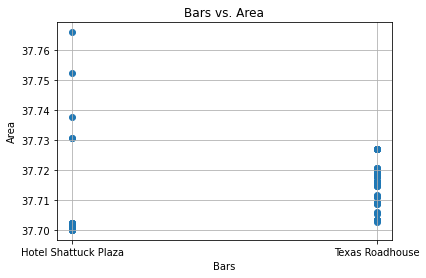

<Figure size 432x288 with 0 Axes>

In [48]:
# Plot scatter plot
plt.scatter(random_zip['Bars Near Crash'],random_zip['Start_Lat'])

# Plot regression line



# Label plot
plt.title('Bars vs. Area')
plt.xlabel('Bars')
plt.ylabel('Area')
plt.grid()

# Print r square value


# Show plot
plt.show()
plt.savefig("Bar1chart")

<BarContainer object of 2471 artists>

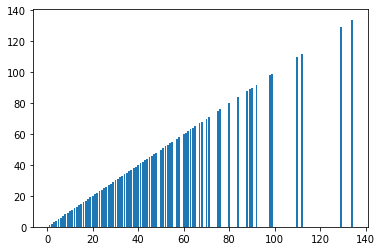

In [19]:
zip_group = bar_data.groupby('Zipcode')

# Count how many times each maker appears in our group
zip_code = zip_group['Zipcode'].count()

zip_code

plt.bar(zip_code,zip_code)

In [43]:
items_counts = bar_data['Zipcode'].value_counts()
items_counts

94551         134
94607         129
95304         112
94588         110
95823          99
             ... 
95076-9102      1
95960-9564      1
95642-9391      1
94580-2420      1
95407-7525      1
Name: Zipcode, Length: 2471, dtype: int64

In [49]:
random_zip2 = bar_data.loc[bar_data["Zipcode"] == "94607",:]
random_zip2


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Zipcode,State
770,A-771,3,6/21/2016 13:02,6/21/2016 13:32,37.825397,-122.304802,94607,CA
856,A-857,3,6/22/2016 10:33,6/22/2016 11:03,37.798454,-122.274803,94607,CA
893,A-894,3,6/22/2016 12:56,6/22/2016 13:26,37.795124,-122.266594,94607,CA
896,A-897,3,6/22/2016 13:05,6/22/2016 13:35,37.793484,-122.263992,94607,CA
1022,A-1023,3,6/23/2016 12:05,6/23/2016 12:35,37.825237,-122.305832,94607,CA
...,...,...,...,...,...,...,...,...
10728,A-10729,3,1/11/2017 4:46,1/11/2017 5:30,37.828934,-122.293770,94607,CA
10843,A-10844,3,1/12/2017 5:53,1/12/2017 6:29,37.827106,-122.296150,94607,CA
11078,A-11079,3,1/13/2017 19:59,1/13/2017 20:29,37.823292,-122.316734,94607,CA
11245,A-11246,3,1/15/2017 20:50,1/15/2017 21:20,37.807938,-122.304504,94607,CA


In [52]:
params = {
    "radius": 50000,
    "types": "bar",
    "key": gkey
}


for index, row in random_zip2.iterrows():
    # get lat, lng from df
    lat = row["Start_Lat"]
    lng = row["Start_Lng"]

    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"

    
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # make request and print url
    name_address = requests.get(base_url, params=params)
    

    # convert to json
    name_address = name_address.json()
    # print(json.dumps(name_address, indent=4, sort_keys=True))

    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        random_zip2.loc[index, "Bars Near Crash"] = name_address["results"][0]["name"]
       
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

C:\Users\wdonah.PVHCORP\Anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\wdonah.PVHCORP\Anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [53]:
random_zip2

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Zipcode,State,Bars Near Crash
770,A-771,3,6/21/2016 13:02,6/21/2016 13:32,37.825397,-122.304802,94607,CA,Hotel Shattuck Plaza
856,A-857,3,6/22/2016 10:33,6/22/2016 11:03,37.798454,-122.274803,94607,CA,Hotel Shattuck Plaza
893,A-894,3,6/22/2016 12:56,6/22/2016 13:26,37.795124,-122.266594,94607,CA,Hotel Shattuck Plaza
896,A-897,3,6/22/2016 13:05,6/22/2016 13:35,37.793484,-122.263992,94607,CA,Hotel Shattuck Plaza
1022,A-1023,3,6/23/2016 12:05,6/23/2016 12:35,37.825237,-122.305832,94607,CA,Hotel Shattuck Plaza
...,...,...,...,...,...,...,...,...,...
10728,A-10729,3,1/11/2017 4:46,1/11/2017 5:30,37.828934,-122.293770,94607,CA,Hotel Shattuck Plaza
10843,A-10844,3,1/12/2017 5:53,1/12/2017 6:29,37.827106,-122.296150,94607,CA,Hotel Shattuck Plaza
11078,A-11079,3,1/13/2017 19:59,1/13/2017 20:29,37.823292,-122.316734,94607,CA,Hotel Shattuck Plaza
11245,A-11246,3,1/15/2017 20:50,1/15/2017 21:20,37.807938,-122.304504,94607,CA,Hotel Shattuck Plaza


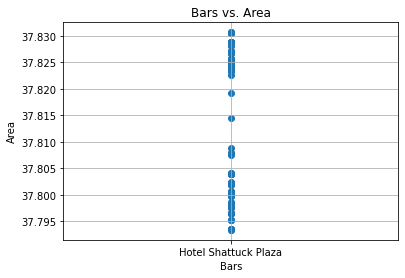

<Figure size 432x288 with 0 Axes>

In [54]:
# Plot scatter plot
plt.scatter(random_zip2['Bars Near Crash'],random_zip2['Start_Lat'])

# Plot regression line



# Label plot
plt.title('Bars vs. Area')
plt.xlabel('Bars')
plt.ylabel('Area')
plt.grid()

# Print r square value


# Show plot
plt.show()
plt.savefig("Bar2chart")

In [55]:
random_zip3 = bar_data.loc[bar_data["Zipcode"] == "95304",:]
random_zip3


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Zipcode,State
810,A-811,3,6/21/2016 20:03,6/21/2016 20:48,37.766987,-121.335495,95304,CA
946,A-947,2,6/22/2016 20:20,6/22/2016 21:05,37.638012,-121.324409,95304,CA
960,A-961,1,6/22/2016 23:54,6/23/2016 0:39,37.750488,-121.379982,95304,CA
1061,A-1062,3,6/23/2016 17:51,6/23/2016 18:51,37.763535,-121.418747,95304,CA
1187,A-1188,3,6/24/2016 21:45,6/24/2016 22:45,37.592789,-121.335754,95304,CA
...,...,...,...,...,...,...,...,...
10949,A-10950,3,1/12/2017 22:48,1/12/2017 23:18,37.764702,-121.409195,95304,CA
11081,A-11082,3,1/13/2017 20:07,1/13/2017 20:36,37.740891,-121.505043,95304,CA
11082,A-11083,3,1/13/2017 20:26,1/13/2017 20:56,37.764755,-121.390137,95304,CA
11230,A-11231,3,1/15/2017 16:05,1/15/2017 16:50,37.762814,-121.431549,95304,CA


In [56]:
params = {
    "radius": 50000,
    "types": "bar",
    "key": gkey
}


for index, row in random_zip3.iterrows():
    # get lat, lng from df
    lat = row["Start_Lat"]
    lng = row["Start_Lng"]

    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"

    
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # make request and print url
    name_address = requests.get(base_url, params=params)
    

    # convert to json
    name_address = name_address.json()
    # print(json.dumps(name_address, indent=4, sort_keys=True))

    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        random_zip3.loc[index, "Bars Near Crash"] = name_address["results"][0]["name"]
       
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

C:\Users\wdonah.PVHCORP\Anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\wdonah.PVHCORP\Anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [57]:
random_zip3

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Zipcode,State,Bars Near Crash
810,A-811,3,6/21/2016 20:03,6/21/2016 20:48,37.766987,-121.335495,95304,CA,Quality Inn Modesto - Salida
946,A-947,2,6/22/2016 20:20,6/22/2016 21:05,37.638012,-121.324409,95304,CA,Quality Inn Modesto - Salida
960,A-961,1,6/22/2016 23:54,6/23/2016 0:39,37.750488,-121.379982,95304,CA,Quality Inn Modesto - Salida
1061,A-1062,3,6/23/2016 17:51,6/23/2016 18:51,37.763535,-121.418747,95304,CA,Quality Inn Modesto - Salida
1187,A-1188,3,6/24/2016 21:45,6/24/2016 22:45,37.592789,-121.335754,95304,CA,Quality Inn Modesto - Salida
...,...,...,...,...,...,...,...,...,...
10949,A-10950,3,1/12/2017 22:48,1/12/2017 23:18,37.764702,-121.409195,95304,CA,Quality Inn Modesto - Salida
11081,A-11082,3,1/13/2017 20:07,1/13/2017 20:36,37.740891,-121.505043,95304,CA,Quality Inn Modesto - Salida
11082,A-11083,3,1/13/2017 20:26,1/13/2017 20:56,37.764755,-121.390137,95304,CA,Quality Inn Modesto - Salida
11230,A-11231,3,1/15/2017 16:05,1/15/2017 16:50,37.762814,-121.431549,95304,CA,Quality Inn Modesto - Salida


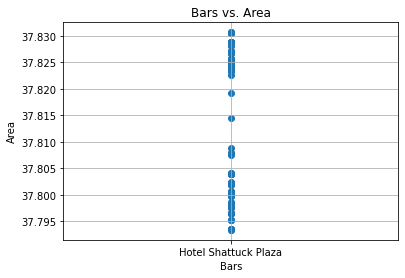

<Figure size 432x288 with 0 Axes>

In [58]:
# Plot scatter plot
plt.scatter(random_zip2['Bars Near Crash'],random_zip2['Start_Lat'])

# Plot regression line



# Label plot
plt.title('Bars vs. Area')
plt.xlabel('Bars')
plt.ylabel('Area')
plt.grid()

# Print r square value


# Show plot
plt.show()
plt.savefig("Bar3chart")

In [59]:
random_zip4 = bar_data.loc[bar_data["Zipcode"] == "94588",:]
random_zip4

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Zipcode,State
733,A-734,3,6/21/2016 10:31,6/21/2016 11:16,37.701584,-121.906929,94588,CA
749,A-750,3,6/21/2016 11:34,6/21/2016 12:04,37.701363,-121.849533,94588,CA
807,A-808,3,6/21/2016 19:46,6/21/2016 20:16,37.701649,-121.911278,94588,CA
965,A-966,3,6/23/2016 2:30,6/23/2016 3:30,37.690514,-121.918709,94588,CA
1000,A-1001,3,6/23/2016 10:42,6/23/2016 11:12,37.701363,-121.849533,94588,CA
...,...,...,...,...,...,...,...,...
11080,A-11081,3,1/13/2017 20:15,1/13/2017 20:45,37.700935,-121.922119,94588,CA
11125,A-11126,3,1/14/2017 5:29,1/14/2017 6:13,37.700802,-121.922760,94588,CA
11139,A-11140,3,1/14/2017 10:36,1/14/2017 11:05,37.701603,-121.874664,94588,CA
11251,A-11252,3,1/15/2017 21:44,1/15/2017 22:13,37.701405,-121.888115,94588,CA


In [60]:
params = {
    "radius": 50000,
    "types": "bar",
    "key": gkey
}


for index, row in random_zip4.iterrows():
    # get lat, lng from df
    lat = row["Start_Lat"]
    lng = row["Start_Lng"]

    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"

    
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # make request and print url
    name_address = requests.get(base_url, params=params)
    

    # convert to json
    name_address = name_address.json()
    # print(json.dumps(name_address, indent=4, sort_keys=True))

    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        random_zip4.loc[index, "Bars Near Crash"] = name_address["results"][0]["name"]
       
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

C:\Users\wdonah.PVHCORP\Anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\wdonah.PVHCORP\Anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [61]:
random_zip4

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Zipcode,State,Bars Near Crash
733,A-734,3,6/21/2016 10:31,6/21/2016 11:16,37.701584,-121.906929,94588,CA,Hotel Shattuck Plaza
749,A-750,3,6/21/2016 11:34,6/21/2016 12:04,37.701363,-121.849533,94588,CA,Hotel Shattuck Plaza
807,A-808,3,6/21/2016 19:46,6/21/2016 20:16,37.701649,-121.911278,94588,CA,Hotel Shattuck Plaza
965,A-966,3,6/23/2016 2:30,6/23/2016 3:30,37.690514,-121.918709,94588,CA,Hotel Shattuck Plaza
1000,A-1001,3,6/23/2016 10:42,6/23/2016 11:12,37.701363,-121.849533,94588,CA,Hotel Shattuck Plaza
...,...,...,...,...,...,...,...,...,...
11080,A-11081,3,1/13/2017 20:15,1/13/2017 20:45,37.700935,-121.922119,94588,CA,Hotel Shattuck Plaza
11125,A-11126,3,1/14/2017 5:29,1/14/2017 6:13,37.700802,-121.922760,94588,CA,Hotel Shattuck Plaza
11139,A-11140,3,1/14/2017 10:36,1/14/2017 11:05,37.701603,-121.874664,94588,CA,Hotel Shattuck Plaza
11251,A-11252,3,1/15/2017 21:44,1/15/2017 22:13,37.701405,-121.888115,94588,CA,Hotel Shattuck Plaza


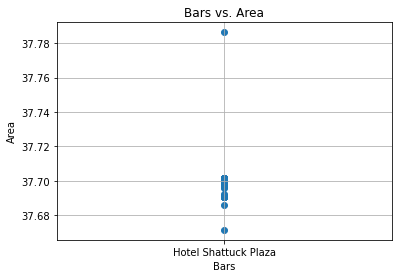

<Figure size 432x288 with 0 Axes>

In [62]:
plt.scatter(random_zip4['Bars Near Crash'],random_zip4['Start_Lat'])

# Plot regression line



# Label plot
plt.title('Bars vs. Area')
plt.xlabel('Bars')
plt.ylabel('Area')
plt.grid()

# Print r square value


# Show plot
plt.show()
plt.savefig("Bar4chart")

In [64]:
random_zip5 = bar_data.loc[bar_data["Zipcode"] == "95823",:]
random_zip5

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Zipcode,State
876,A-877,2,6/22/2016 11:19,6/22/2016 12:04,38.510151,-121.459702,95823,CA
898,A-899,2,6/22/2016 13:19,6/22/2016 14:04,38.478897,-121.421066,95823,CA
1008,A-1009,2,6/23/2016 10:54,6/23/2016 12:09,38.510448,-121.460121,95823,CA
1106,A-1107,2,6/24/2016 10:14,6/24/2016 10:59,38.496033,-121.446091,95823,CA
1475,A-1476,2,6/27/2016 20:29,6/27/2016 21:59,38.500240,-121.435188,95823,CA
...,...,...,...,...,...,...,...,...
11021,A-11022,2,1/13/2017 12:36,1/13/2017 13:05,38.469612,-121.418022,95823,CA
11054,A-11055,2,1/13/2017 18:21,1/13/2017 18:51,38.493591,-121.457993,95823,CA
11071,A-11072,2,1/13/2017 19:28,1/13/2017 19:57,38.495804,-121.445557,95823,CA
11321,A-11322,2,1/16/2017 17:03,1/16/2017 17:47,38.474407,-121.419067,95823,CA


In [65]:
params = {
    "radius": 50000,
    "types": "bar",
    "key": gkey
}


for index, row in random_zip5.iterrows():
    # get lat, lng from df
    lat = row["Start_Lat"]
    lng = row["Start_Lng"]

    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"

    
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # make request and print url
    name_address = requests.get(base_url, params=params)
    

    # convert to json
    name_address = name_address.json()
    # print(json.dumps(name_address, indent=4, sort_keys=True))

    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        random_zip5.loc[index, "Bars Near Crash"] = name_address["results"][0]["name"]
       
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

C:\Users\wdonah.PVHCORP\Anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\wdonah.PVHCORP\Anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [66]:
random_zip5

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Zipcode,State,Bars Near Crash
876,A-877,2,6/22/2016 11:19,6/22/2016 12:04,38.510151,-121.459702,95823,CA,BJ's Restaurant & Brewhouse
898,A-899,2,6/22/2016 13:19,6/22/2016 14:04,38.478897,-121.421066,95823,CA,BJ's Restaurant & Brewhouse
1008,A-1009,2,6/23/2016 10:54,6/23/2016 12:09,38.510448,-121.460121,95823,CA,BJ's Restaurant & Brewhouse
1106,A-1107,2,6/24/2016 10:14,6/24/2016 10:59,38.496033,-121.446091,95823,CA,BJ's Restaurant & Brewhouse
1475,A-1476,2,6/27/2016 20:29,6/27/2016 21:59,38.500240,-121.435188,95823,CA,BJ's Restaurant & Brewhouse
...,...,...,...,...,...,...,...,...,...
11021,A-11022,2,1/13/2017 12:36,1/13/2017 13:05,38.469612,-121.418022,95823,CA,BJ's Restaurant & Brewhouse
11054,A-11055,2,1/13/2017 18:21,1/13/2017 18:51,38.493591,-121.457993,95823,CA,BJ's Restaurant & Brewhouse
11071,A-11072,2,1/13/2017 19:28,1/13/2017 19:57,38.495804,-121.445557,95823,CA,BJ's Restaurant & Brewhouse
11321,A-11322,2,1/16/2017 17:03,1/16/2017 17:47,38.474407,-121.419067,95823,CA,BJ's Restaurant & Brewhouse


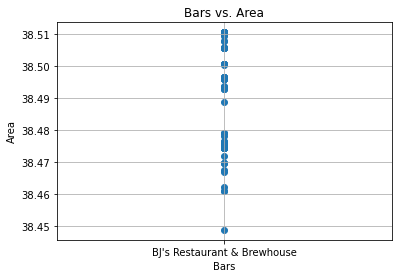

<Figure size 432x288 with 0 Axes>

In [67]:
plt.scatter(random_zip5['Bars Near Crash'],random_zip5['Start_Lat'])

# Plot regression line



# Label plot
plt.title('Bars vs. Area')
plt.xlabel('Bars')
plt.ylabel('Area')
plt.grid()

# Print r square value


# Show plot
plt.show()
plt.savefig("Bar5chart")